# LINEAR REGRESSION : HOUSE PRICE PREDICTION
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("C:/Users/sachin/OneDrive/Desktop/datasets/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
x = data.drop(["median_house_value"], axis = 1)

In [137]:
y = data["median_house_value"]

In [138]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [139]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [141]:
train_data = x_train.join(y_train)

In [142]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8672,-118.38,33.82,38.0,1318.0,237.0,547.0,225.0,6.0308,NEAR OCEAN,416700.0
14455,-117.28,32.83,34.0,2392.0,653.0,933.0,619.0,3.7306,NEAR OCEAN,500000.0
1583,-121.97,37.87,4.0,1029.0,126.0,416.0,122.0,13.4883,INLAND,500001.0
15065,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,<1H OCEAN,104200.0
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,INLAND,311500.0
...,...,...,...,...,...,...,...,...,...,...
10390,-117.65,33.57,5.0,1998.0,500.0,1185.0,446.0,4.3542,<1H OCEAN,195600.0
15404,-117.24,33.23,13.0,3756.0,648.0,1767.0,614.0,4.0776,<1H OCEAN,196000.0
8724,-118.36,33.83,35.0,1378.0,247.0,645.0,217.0,5.9143,<1H OCEAN,343400.0
9071,-118.15,34.71,35.0,1503.0,309.0,842.0,300.0,2.5278,INLAND,97700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

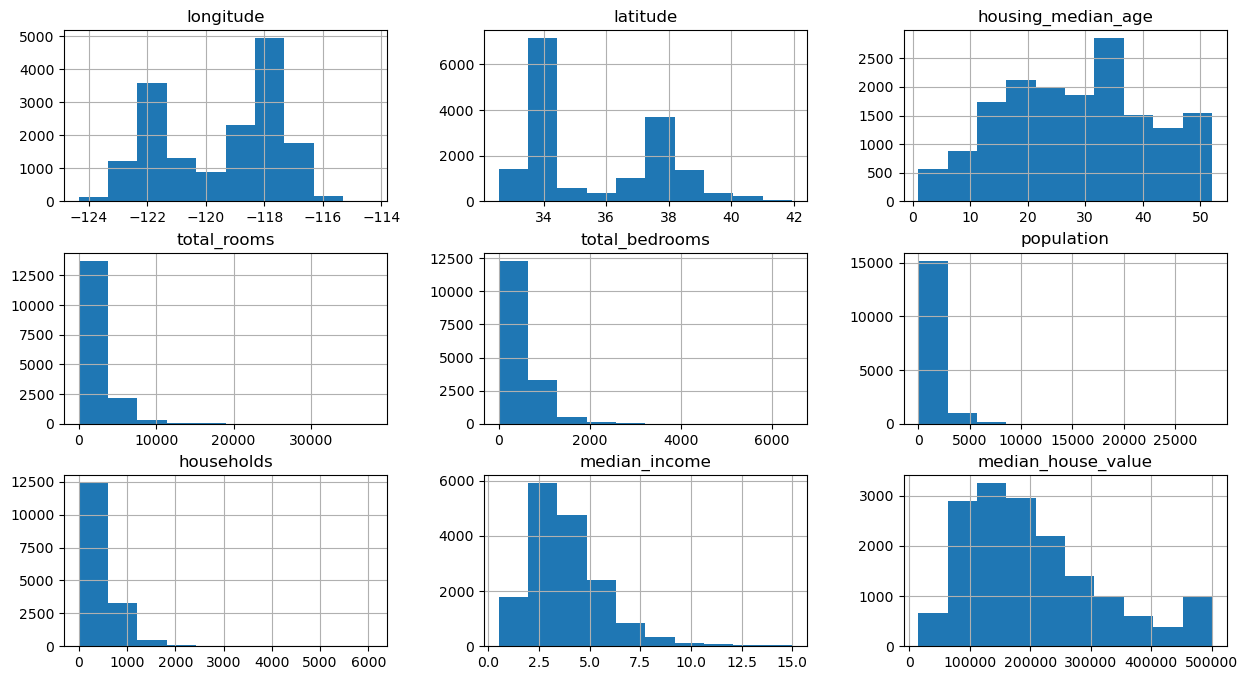

In [143]:
train_data.hist(figsize = (15,8))

C:\Users\sachin\AppData\Local\Temp\ipykernel_20092\2274627523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

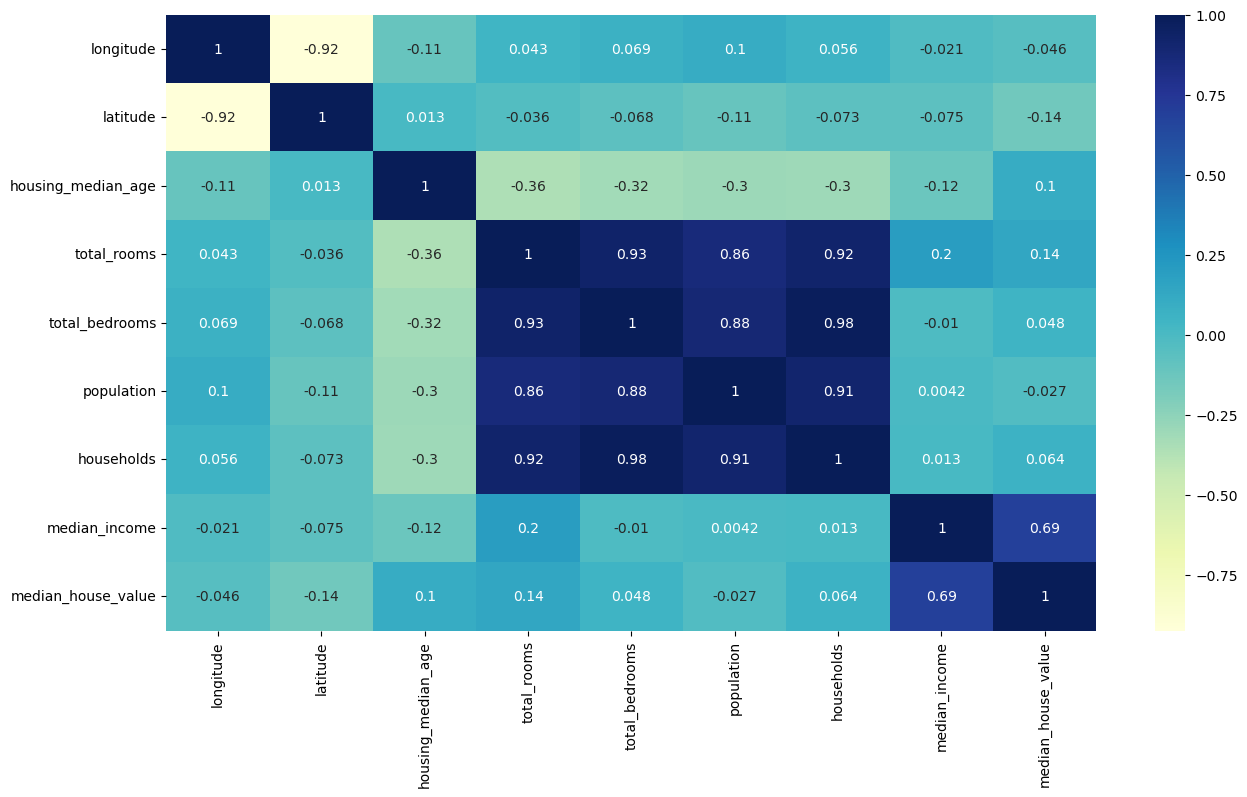

In [144]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

# data pre-processing

In [145]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

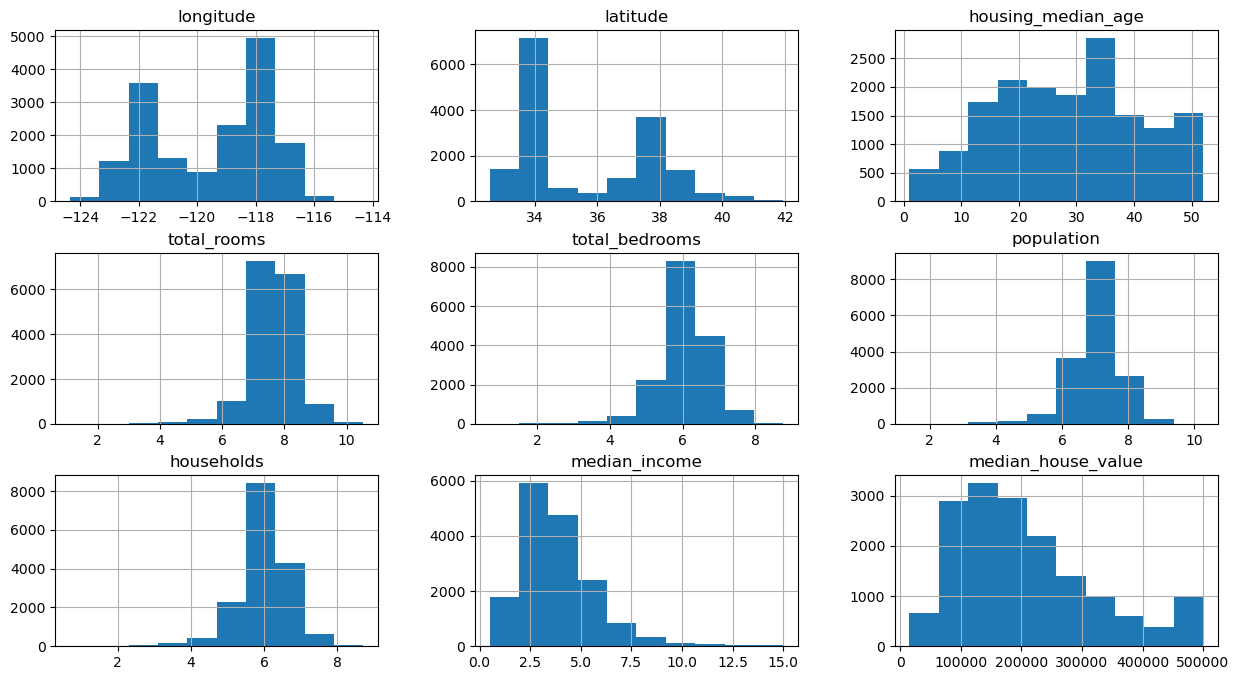

In [146]:
train_data.hist(figsize = (15,8))

In [147]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7292
INLAND        5165
NEAR OCEAN    2099
NEAR BAY      1786
ISLAND           4
Name: ocean_proximity, dtype: int64

In [148]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis = 1)

# Task 1: Which features seem to influence house prices the most?

<Axes: >

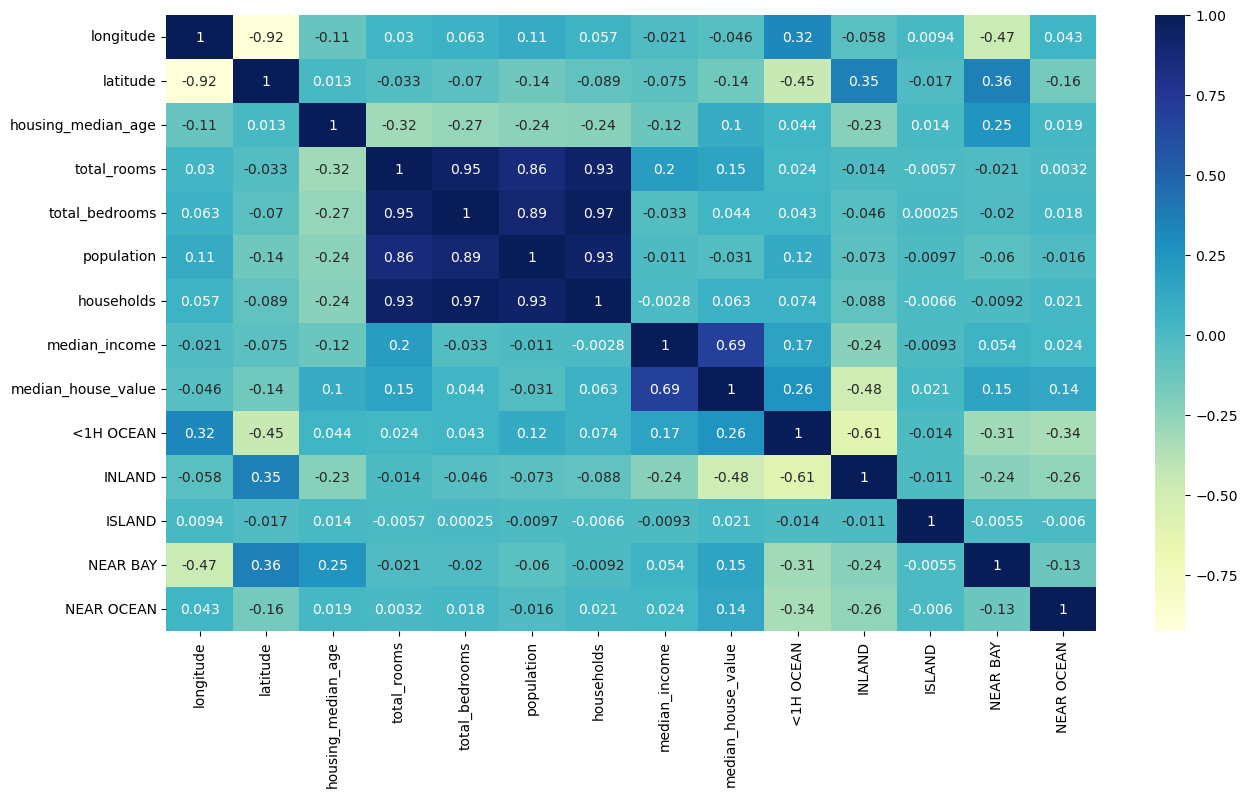

In [149]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

# Ans - median_income

<Axes: xlabel='latitude', ylabel='longitude'>

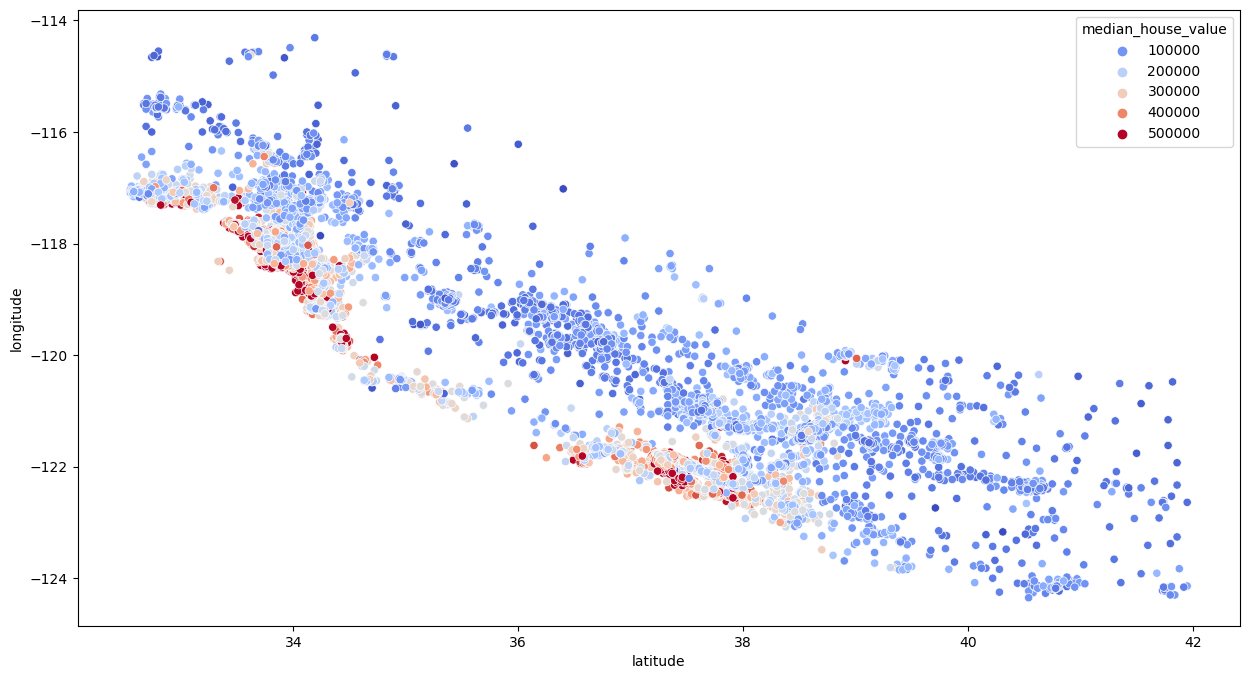

In [150]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude',y = 'longitude',data = train_data, hue = 'median_house_value',palette = "coolwarm")

# feature enginnering

In [151]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['housholds_room'] = train_data['total_rooms'] / train_data['households']


<Axes: >

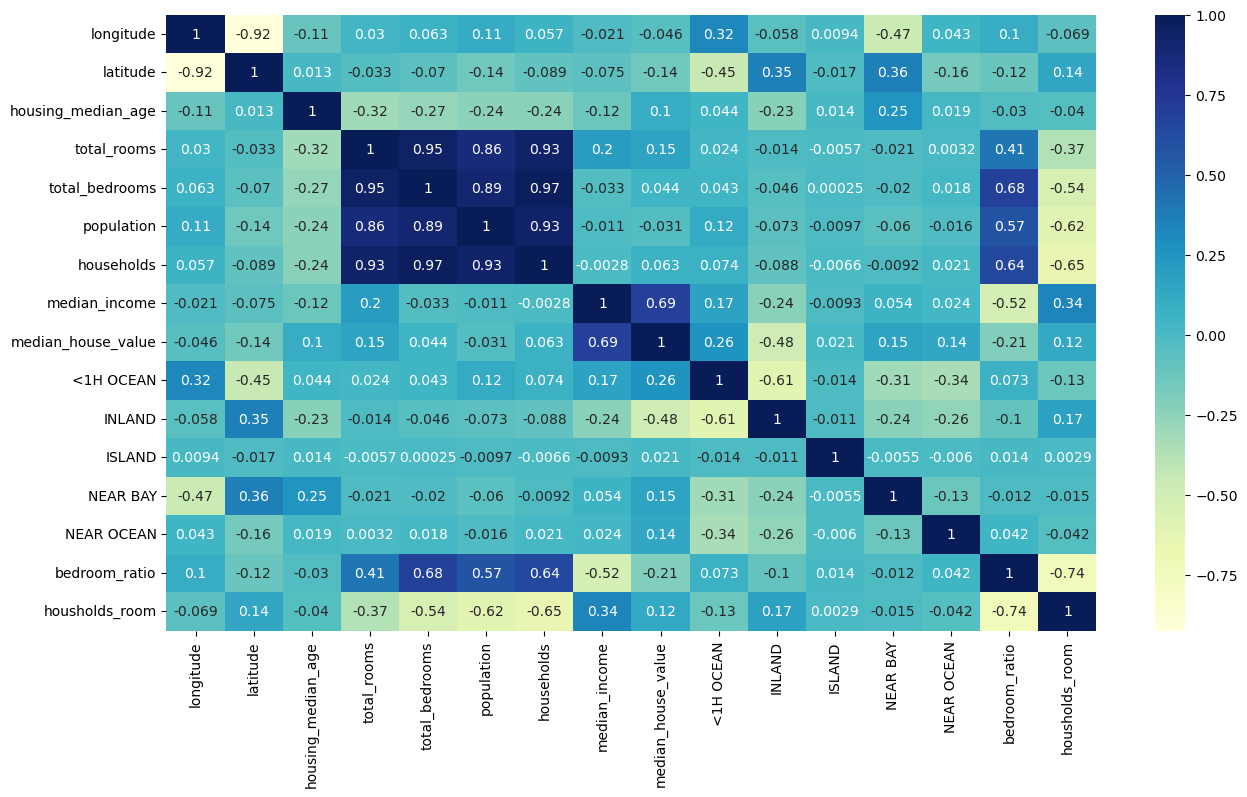

In [152]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train,y_train = train_data.drop(["median_house_value"], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [155]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['housholds_room'] = test_data['total_rooms'] / test_data['households']



In [156]:
x_test,y_test = test_data.drop(["median_house_value"], axis = 1), test_data['median_house_value']

In [162]:
x_test_s = scaler.transform(x_test)

# Task 2 How accurate are the model's predictions?

In [163]:
reg.score(x_test,y_test)

0.6597633846669051

# Task 3 Can you identify any limitations in the model?

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [167]:
forest.score(x_test_s,y_test)

0.8116791995314127

# task 4 What could be done to improve the model's accuracy or address its limitations?

In [ ]:
# cross validation
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[100,200],
    "min_samples_split":[2,4,6,8],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(x_train,y_train)

In [171]:
best_forest = grid_search.best_estimator_

In [173]:
best_forest.score(x_test,y_test)

0.8085518076305374